In [7]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error, median_absolute_error

In [52]:
train=pd.read_csv('/Users/LeiYu/Desktop/NYC Taxi/mergeby.csv')

In [53]:
train=train.drop(train.columns[[0,4]],1)

In [54]:
index=[random.randint(1,12892771) for i in range(5000)]

In [55]:
train=train.loc[index]

In [56]:
labels=train.total_amount

In [57]:
train=train.drop(['total_amount','Date','trip_distance','tip_amount','Time'],1)
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state = 2)

In [58]:
def scoring(clf):
    scores = cross_val_score(clf, x_train, y_train, cv=15, n_jobs=1, scoring = 'neg_median_absolute_error')
    print (np.median(scores) * -1)

In [59]:
rfr = RandomForestRegressor(n_estimators = 55,
                            min_samples_leaf = 3,
                            random_state = 2)
scoring(rfr)

4.38346069688


In [60]:
gbr = GradientBoostingRegressor(learning_rate = 0.12,
                                n_estimators = 150,
                                max_depth = 8,
                                min_samples_leaf = 1,
                                random_state = 2)
scoring(gbr)

4.40781142873


In [61]:
dtr = DecisionTreeRegressor(min_samples_leaf = 3,
                            max_depth = 8,
                            random_state = 2)
scoring(dtr)

4.49606299213


In [62]:
abr = AdaBoostRegressor(n_estimators = 100,
                        learning_rate = 0.1,
                        loss = 'linear',
                        random_state = 2)
scoring(abr)

6.49108409321


In [65]:
rfr = rfr.fit(x_train, y_train)
gbr = gbr.fit(x_train, y_train)

rfr_preds = rfr.predict(x_test)
gbr_preds = gbr.predict(x_test)
final_preds = rfr_preds*0.5 + gbr_preds*0.5
print ("Average fair error:", median_absolute_error(y_test, final_preds))

('Average fair error:', 4.4267250309897719)


In [66]:
y_test.reset_index(drop=True,inplace=True)

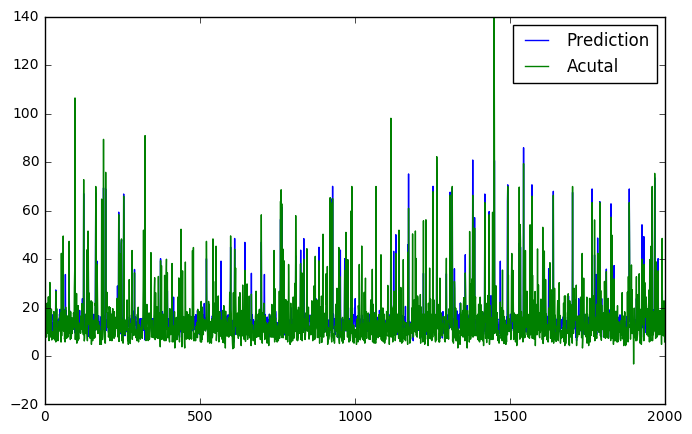

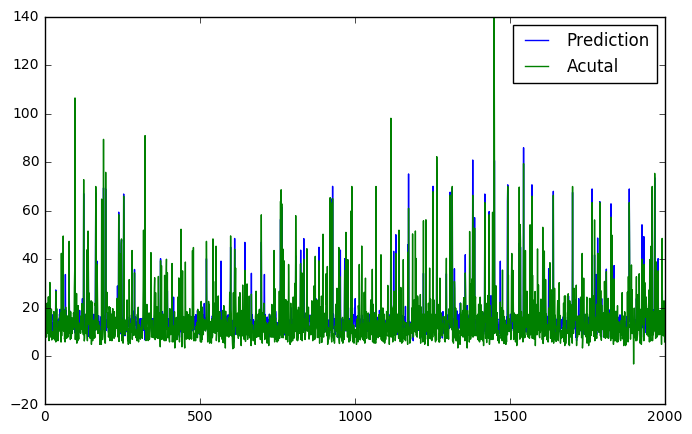

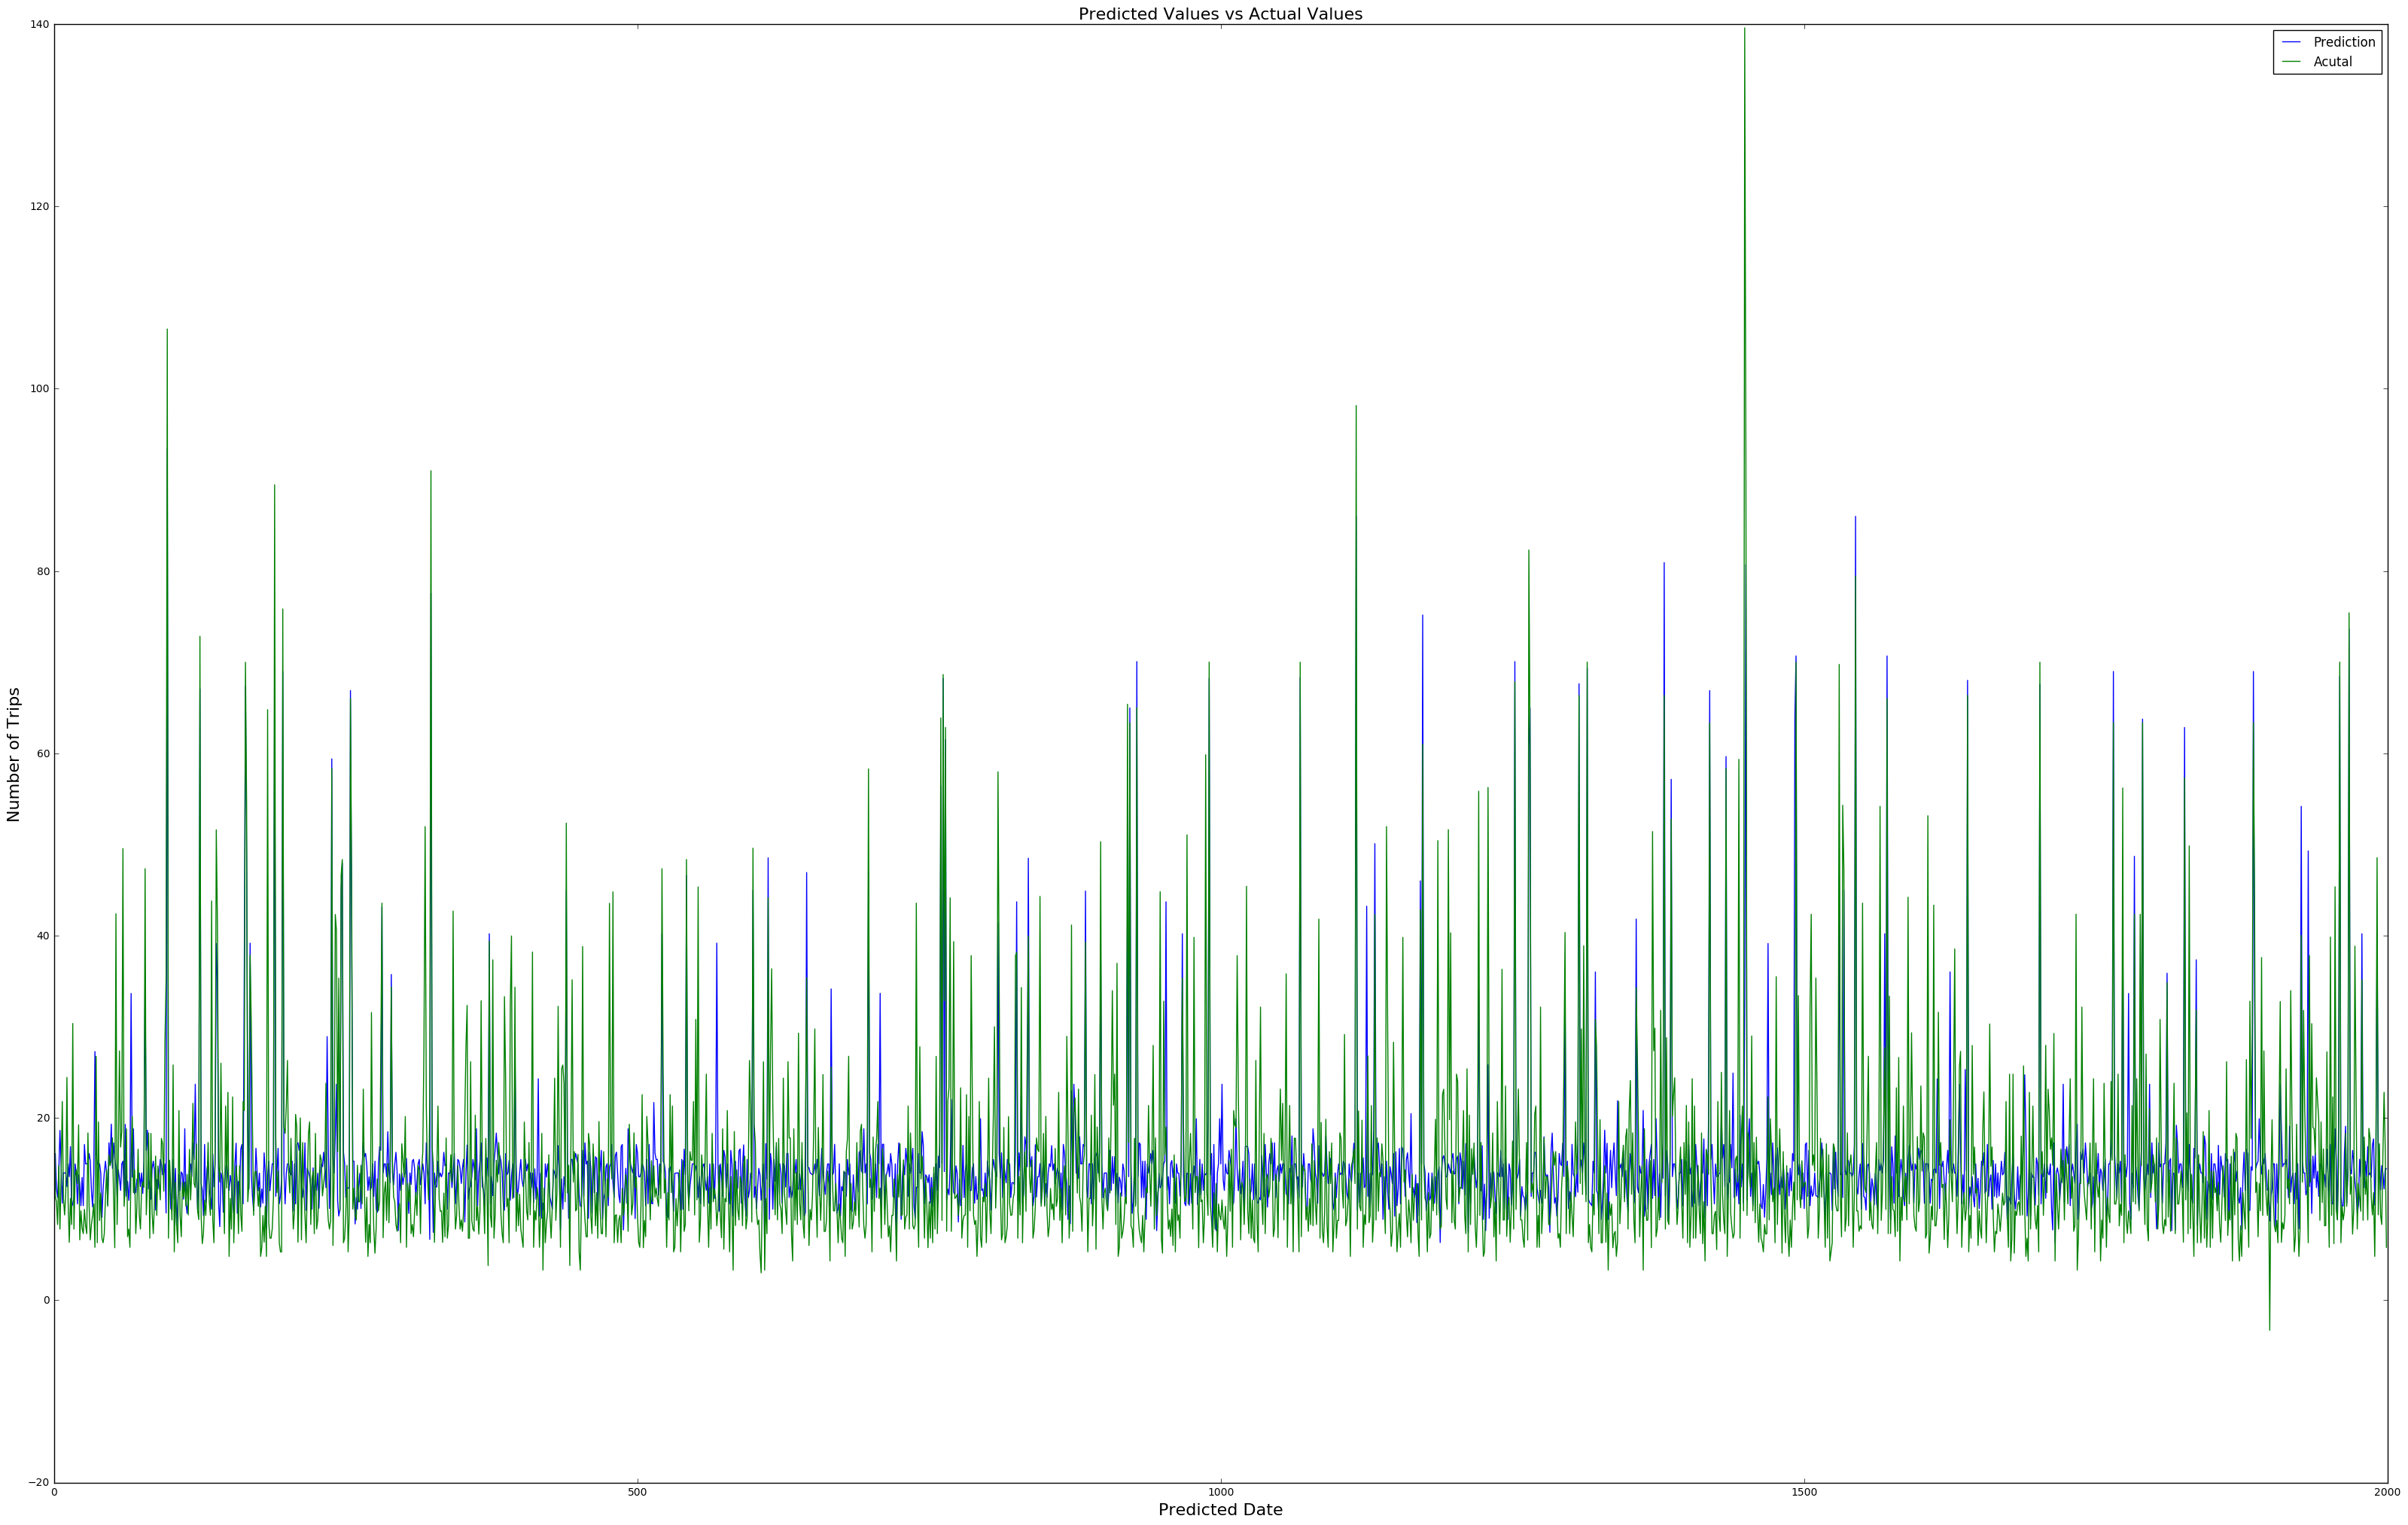

In [69]:
fs = 16
plt.figure(figsize=(40,25))
plt.plot(final_preds)
plt.plot(y_test)
plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Number of Trips", fontsize = fs)
plt.xlabel("Predicted Date", fontsize = fs)
plt.title("Predicted Values vs Actual Values", fontsize = fs)
plt.show()

(0, 'RatecodeID')
(1, 'passenger_count')
(2, 'payment_type')
(3, 'Weekends&holidays')
(4, 'Dawn')
(5, 'MorningRush')
(6, 'Afternoon')
(7, 'NightRush')
(8, 'Midnight')
(9, 'JFK')
(10, 'LGA')
(11, 'EWR')
(12, 'UPM')
(13, 'MIDM')
(14, 'DM')
(15, 'LI')
(16, 'BL')
(17, 'OTHERS')


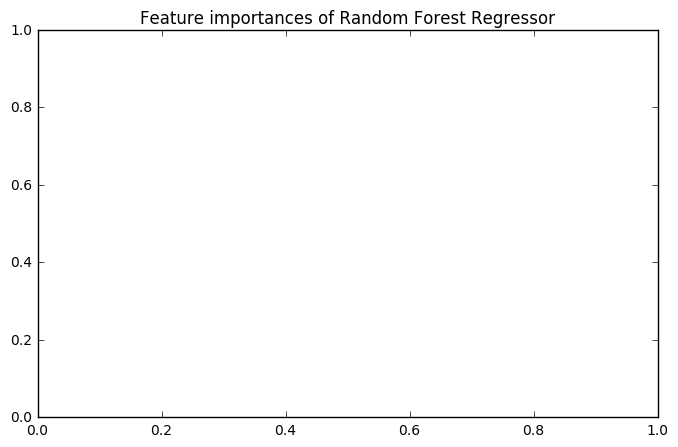

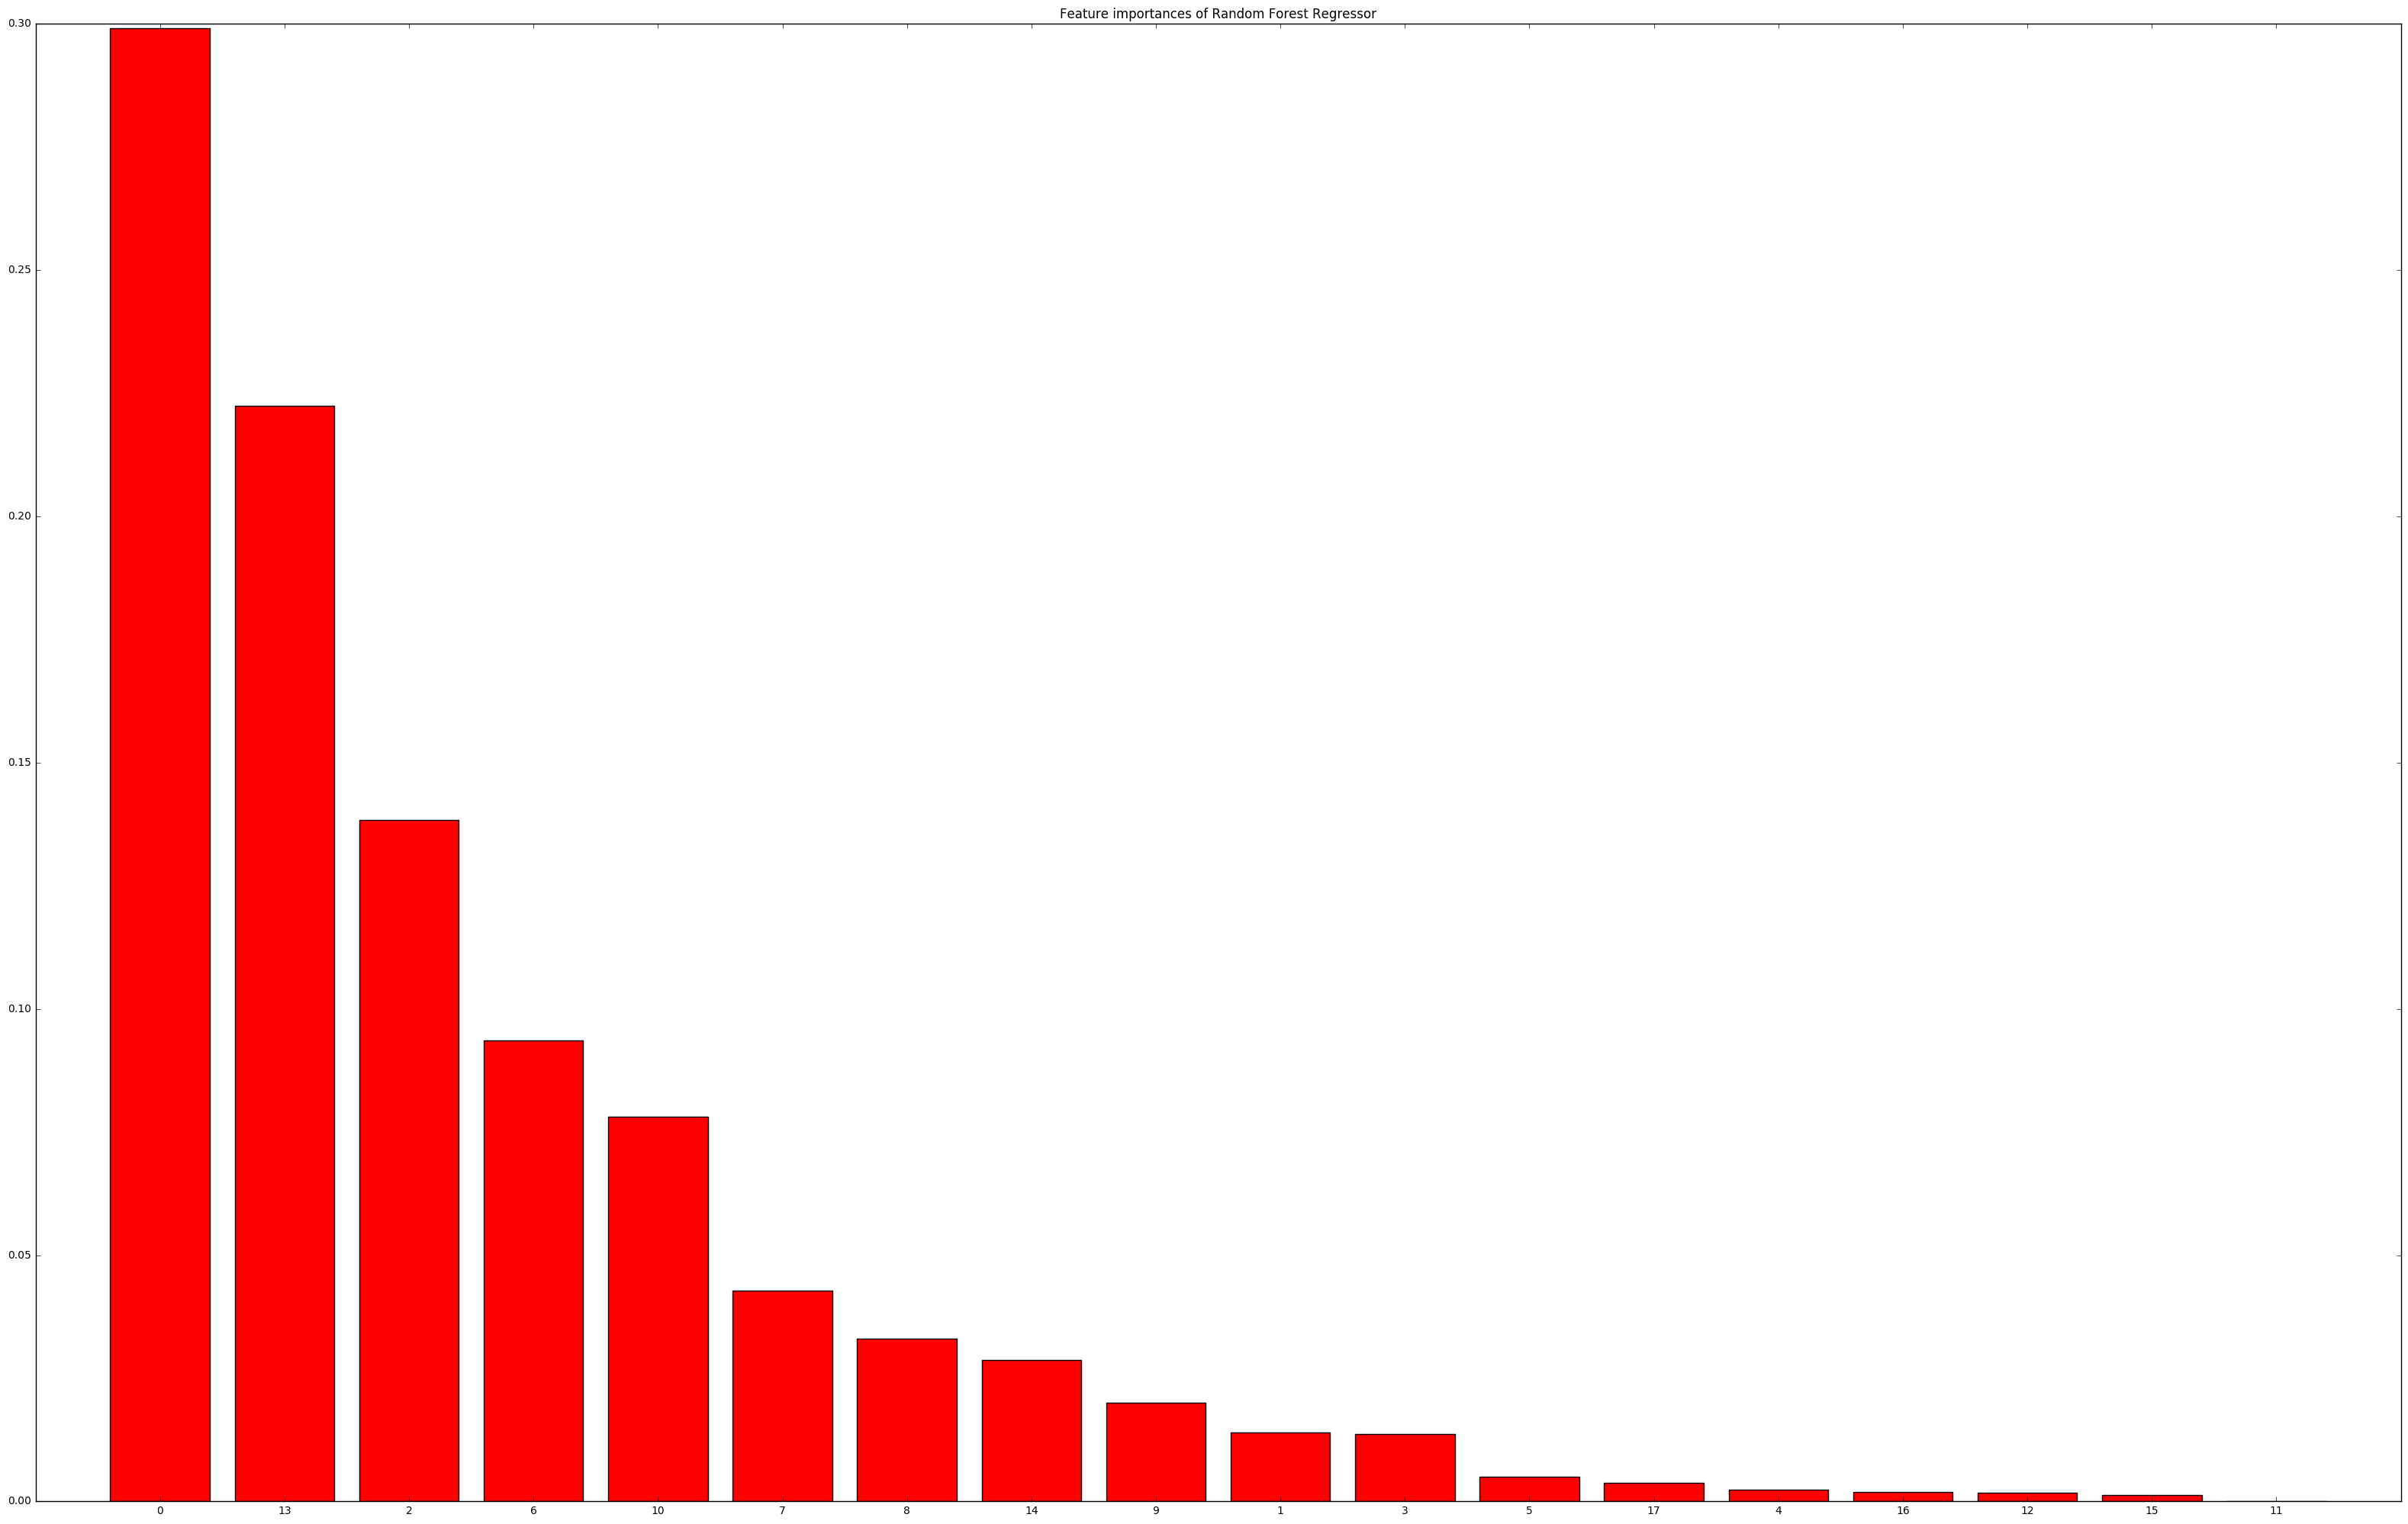

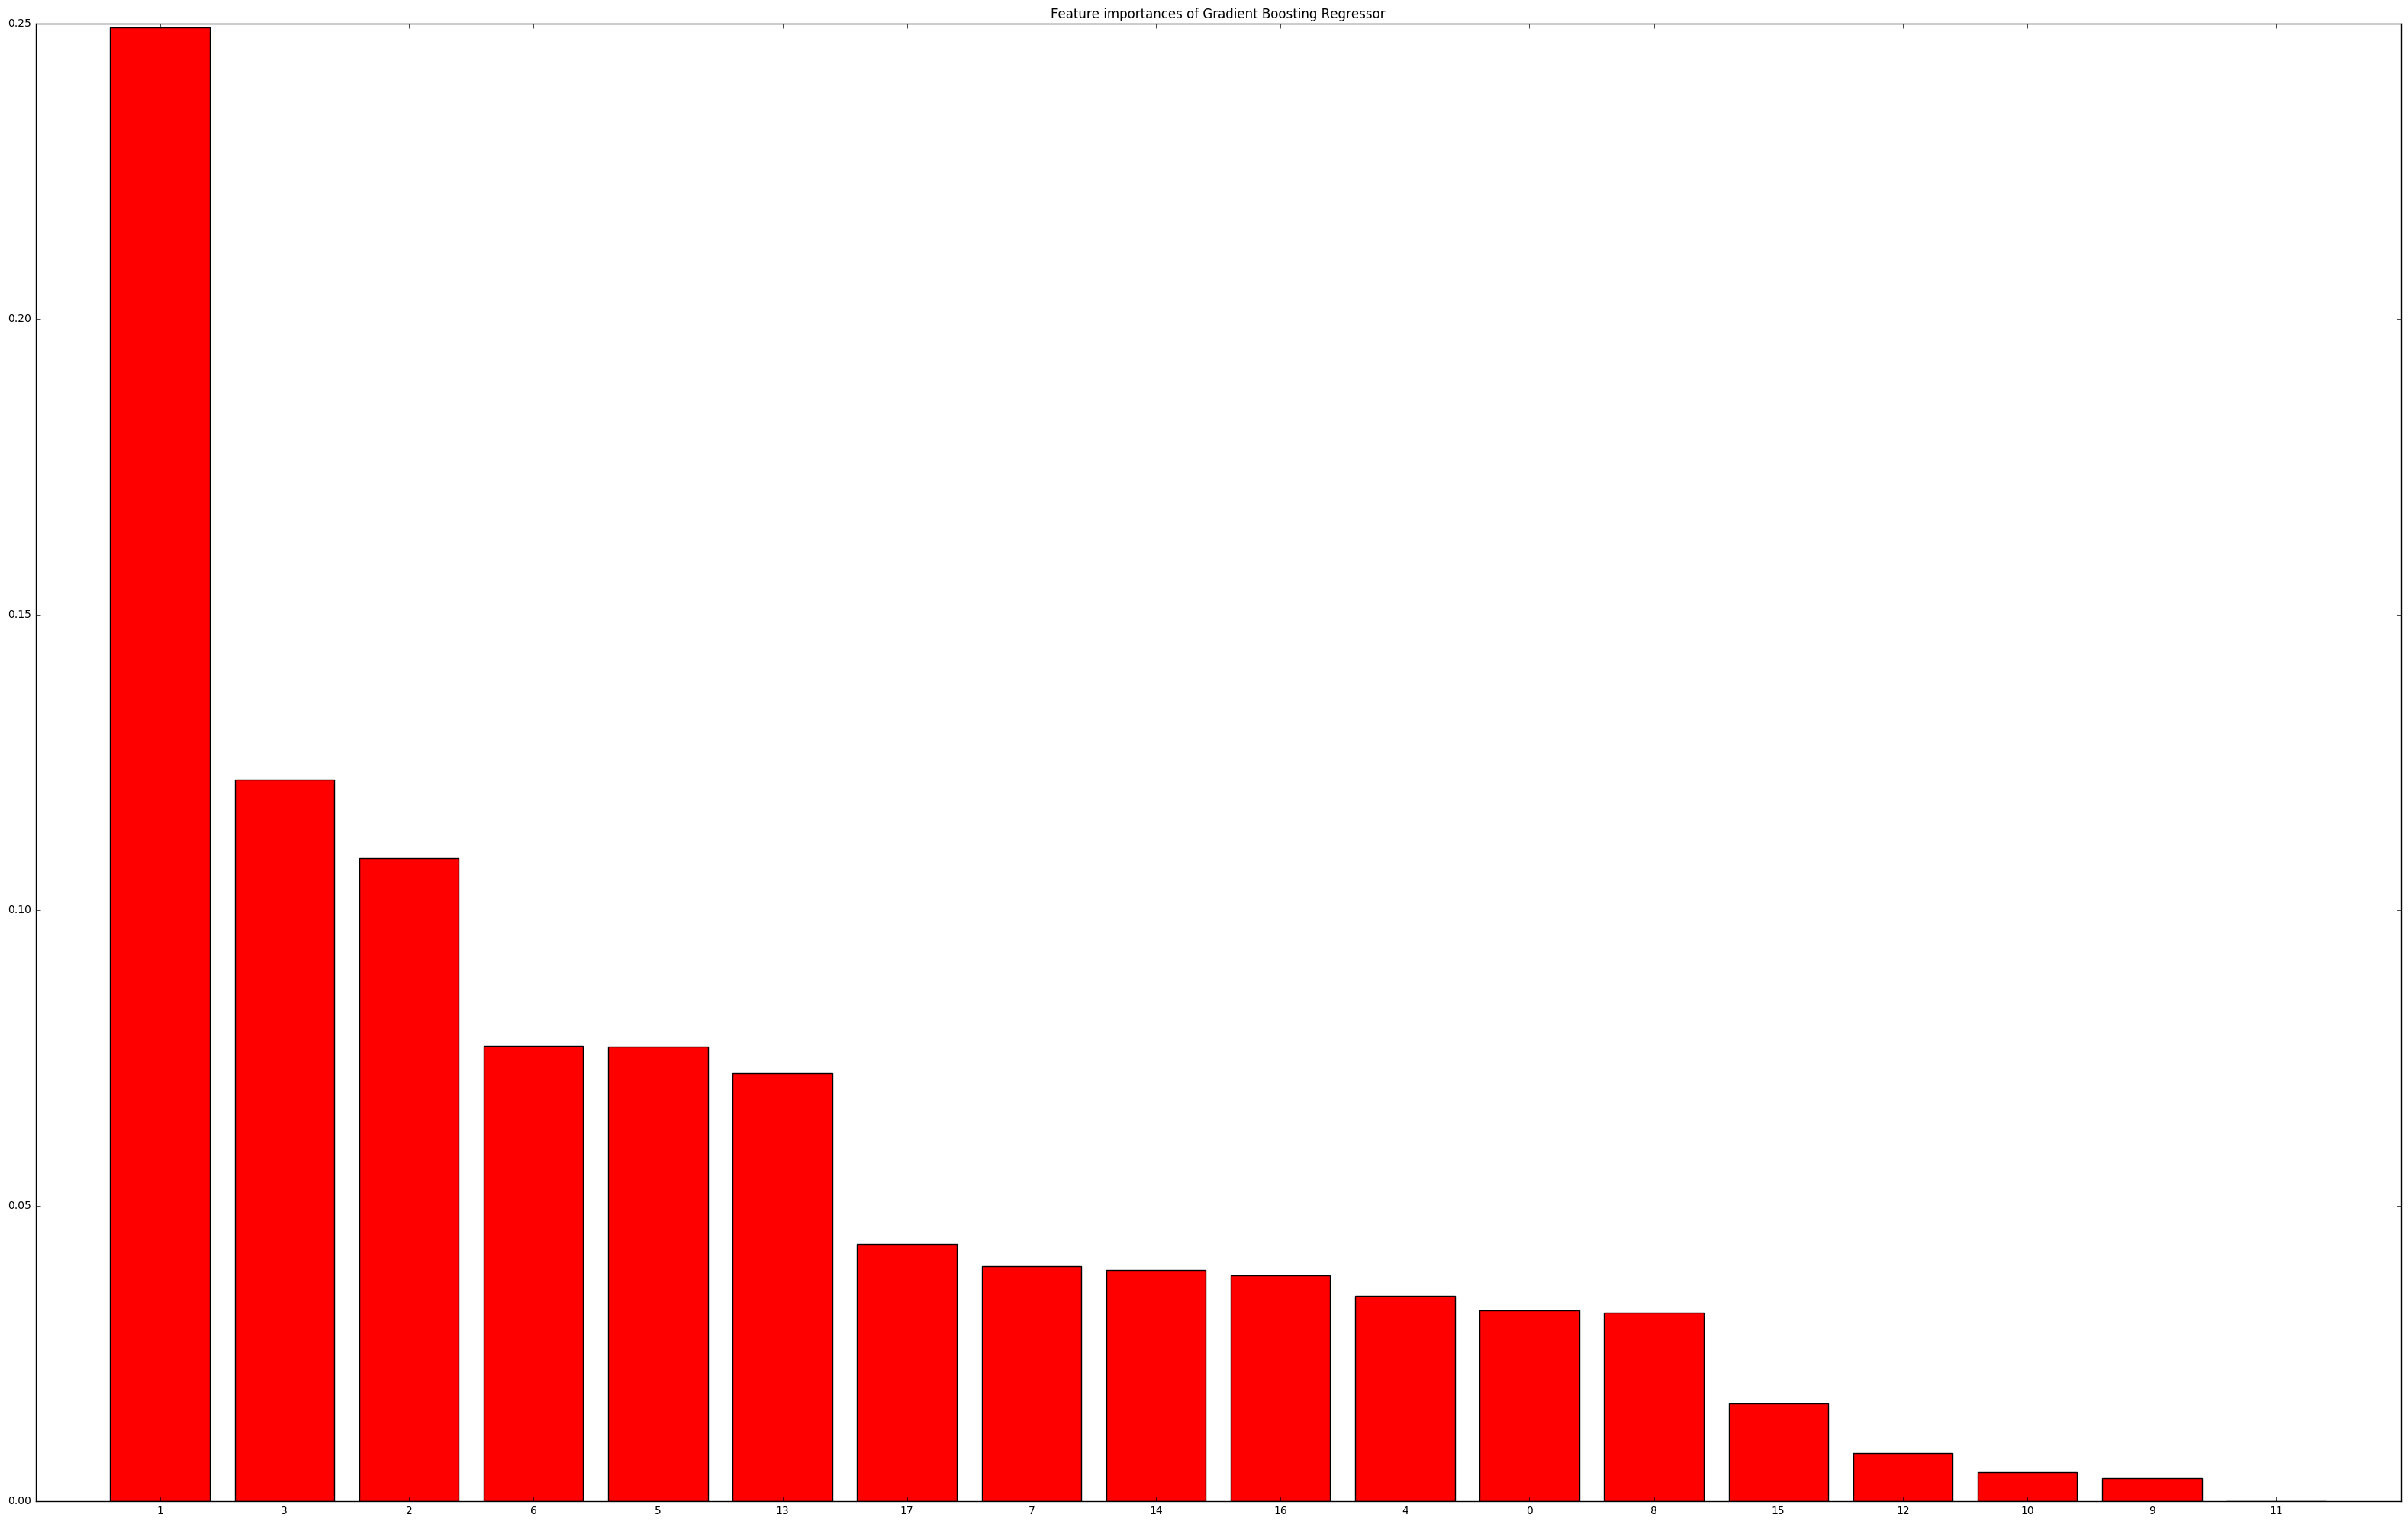

In [71]:
def plot_importances(model, model_name):
    importances = model.feature_importances_
    std = np.std([model.feature_importances_ for feature in model.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]    

    # Plot the feature importances of the forest
    plt.figure(figsize = (40,25))
    plt.title("Feature importances of " + model_name)
    plt.bar(range(x_train.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(x_train.shape[1]), indices)
    plt.xlim([-1, x_train.shape[1]])
    plt.show()

i = 0
for feature in x_train:
    print (i, feature)
    i += 1
    
plot_importances(rfr, "Random Forest Regressor")
plot_importances(gbr, "Gradient Boosting Regressor")